In [22]:
import numpy as np
import matplotlib.pyplot as plt

In [23]:
def printsvg(x,y,gene,N,outfile):
    f = open(outfile,"w");
    f.write("<?xml version=\"1.0\" standalone=\"no\"?>\n")
    f.write("<!DOCTYPE svg PUBLIC \"-//W3C//DTD SVG 1.1//EN\"\n")
    f.write("\"http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd\">\n")
    f.write("<svg    xmlns=\"http://www.w3.org/2000/svg\"\n")
    f.write("        xmlns:xlink=\"http://www.w3.org/1999/xlink\"\n")
    f.write("        width=\"2.2in\" height=\"1.6in\"\n")
    f.write("        viewBox=\"-10 -10 1010 1010\">\n")
    for a in range(N):
        f.write("<circle cx=\"%d\" cy=\"%d\" r=\"25\"\n" % \
            (int(1000*x[a]),int(1000*y[a])))
        f.write(" style=\"")
        if gene[a] == 1:
            f.write("fill:#ff0000;")
        else:
            f.write("fill:#00ff00;")
        f.write("stroke:#000000;stroke-width:8;\"/>\n")
        x0 = 0.0
        y0 = 0.0
        if gene[a] == 0:
            dmin = 1e100
            for b in range(N):
                if gene[b] == 1:
          #it is connected to a hub
                    d = (x[a] - x[b])*(x[a] - x[b]) + (y[a] - y[b])*(y[a] - y[b])
                    if d < dmin:
                        dmin = d
                        x0 = x[b]
                        y0 = y[b]
        f.write("<polyline points=\"%d,%d " %
            (int(1000*x[a]),int(1000*y[a])))
        f.write("%d,%d\n" % (int(1000*x0),int(1000*y0)))
        f.write("\" style=\"stroke:#000000;stroke-width:8;\n")
        f.write("stroke-linejoin:miter stroke-linecap:butt;\"/>\n")
    f.write("</svg>\n")
    f.close()

In [57]:
# smaller the better
def fitness(x,y,gene,N):
    f = 0.0
    for a in range(N):
    # First if it is connected to the center at (0,0)
        if gene[a] == 1:
            f += x[a]*x[a] + y[a]*y[a]
        else:
            dmin = 1e100
            for b in range(N):
                if gene[b] == 1:
          # it is connected to a hub
                    d = (x[a] - x[b])*(x[a] - x[b]) + (y[a] - y[b])*(y[a] - y[b])
                    if d < dmin:
                        dmin = d
      # if there are no hubs but we want to connect to them we get 1e100
      # as fitness which is bad so it's good :-)
            f += dmin
    return(f)

In [58]:
N = 10
x = np.random.random(10)
y = np.random.random(10)
gene = np.random.randint(2,size=N)
printsvg(x,y,gene,N,"a.svg")
print(fitness(x,y,gene,N))

2.93459965089899


In [59]:
def alfit(allomany, M, N, x, y):
    fitvals = np.zeros(M)
    for i in range(M):
        fitvals[i]=(fitness(x = x, y = y, gene = allomany[i], N = N))
    return fitvals

In [60]:
def func(N=10, M=20 , itnum = 100 ,filename="test"):
    fitvallist = np.zeros(itnum+1)
    x = np.random.random(N)
    y = np.random.random(N)
    gene = np.random.randint(2,size=N)
    printsvg(x = x, y = y, gene = gene, N = N, outfile = filename+".svg")
    print(fitness(x = x, y = y, gene = gene, N = N))
    
    allomany = np.random.randint(2,size=N*M).reshape((M,N))
    
    for i in range(itnum):
        fitvals = alfit(allomany = allomany, M = M, N = N, x = x, y = y)
        fitvallist[i] = sum(fitvals)
        index = np.argsort(fitvals)
        for j in range(int(M/2)):
            p1index, p2index = np.random.choice(a = index[:int(M/2)], size = 2,replace = False)
            p1, p2 = allomany[p1index], allomany[p2index]
            crossover = np.random.choice(a = [True,False], size = N, replace = True)
            #TO DO: nicer solution!

            children = np.zeros(N)
            for idx, boolean in enumerate(crossover):
                if boolean:
                    children[idx] = p1[idx]
                else:
                    children[idx] = p2[idx]

            allomany[int(M/2)+j] = children
    fitvals = alfit(allomany = allomany, M = M, N = N, x = x, y = y)
    fitvallist[-1] = sum(fitvals)
    
    printsvg(x,y,allomany[np.argsort(fitvals)][0],N,filename+"2.svg")
    return fitvallist, allomany[np.argsort(fitvals)][0]

In [63]:
a, b = func(N = 40, M = 20,itnum = 1000)

17.905361224019583


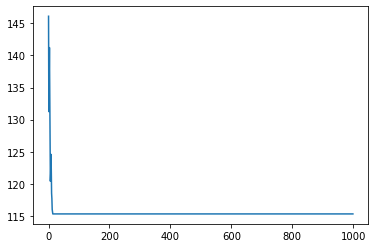

In [62]:
fig = plt.figure()

plt.plot(a[:-1])

In [37]:
b

array([0, 0, 1, 1, 0, 1, 0, 0, 0, 0])